This is the KERAS CNN implementation for the MALARIA CELL IMAGES DATASET

Breakdown of this notebook:

Loading the dataset: Load the data and import the libraries.

In [10]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import cv2
from PIL import Image
# For CNN model creation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import optimizers
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score
SIZE = 64

In [2]:
infected = os.listdir('.\\cell_images\\cell_images\\Parasitized') 
uninfected = os.listdir('.\\cell_images\\cell_images\\Uninfected')

In [3]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread(".\\cell_images\\cell_images\\Parasitized\\"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread(".\\cell_images\\cell_images\\Uninfected\\"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

labels = np.array(labels)

In [4]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:
x_train, x_test = train_test_split(data, test_size=0.2, random_state=1,shuffle = True)
y_train, y_test = train_test_split(labels, test_size=0.2, random_state=1)

x_train_ddl, x_validate_ddl = train_test_split(x_train, test_size=0.2, random_state=2,shuffle = True)
y_train_ddl, y_validate_ddl = train_test_split(y_train, test_size=0.2, random_state=2)
epoch_list = []
for i in range(100):
    epoch_list.append(i)
    
    

In [12]:
#regulization_list = [0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10]
dropout_list = np.arange(0,1,0.05)
# probability axis values 
prob = []
# loss axis values 
loss = []
loss_valid = []
history = []
history_ddl = []
for i in dropout_list:
    classifier = tf.keras.Sequential()
    classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Flatten())
    classifier.add(Dense(  activation = 'relu', units=512))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Dense( activation = 'relu', units=256))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Dense(activation = 'sigmoid', units=2))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())
    
    opt1 = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    history.append( classifier.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 100, 
                         validation_split = 0,
                         shuffle = False))
    
    classifier.compile(optimizer = opt1, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history_ddl.append(classifier.fit(np.array(x_train_ddl), 
                         y_train_ddl, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 10, 
                         validation_split = 0,
                         shuffle = False))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    history_ddl.append(classifier.fit(np.array(x_train_ddl), 
                         y_train_ddl, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 90, 
                         validation_split = 0,
                         shuffle = False))

    print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(x_test), np.array(y_test))[1]*100))
    loss.append(classifier.evaluate(np.array(x_test), np.array(y_test))[0])
    loss_valid.append(classifier.evaluate(np.array( x_validate_ddl), np.array( y_validate_ddl))[0])
   # print(classifier.evaluate(np.array(x_test), np.array(y_test)))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 32)       

Epoch 86/100
22046/22046 - 3s - loss: 2.4366e-09 - accuracy: 1.0000
Epoch 87/100
22046/22046 - 3s - loss: 2.2837e-09 - accuracy: 1.0000
Epoch 88/100
22046/22046 - 3s - loss: 2.1509e-09 - accuracy: 1.0000
Epoch 89/100
22046/22046 - 3s - loss: 2.0329e-09 - accuracy: 1.0000
Epoch 90/100
22046/22046 - 3s - loss: 1.9278e-09 - accuracy: 1.0000
Epoch 91/100
22046/22046 - 3s - loss: 1.8336e-09 - accuracy: 1.0000
Epoch 92/100
22046/22046 - 3s - loss: 1.7488e-09 - accuracy: 1.0000
Epoch 93/100
22046/22046 - 3s - loss: 1.6735e-09 - accuracy: 1.0000
Epoch 94/100
22046/22046 - 3s - loss: 1.6046e-09 - accuracy: 1.0000
Epoch 95/100
22046/22046 - 3s - loss: 1.5412e-09 - accuracy: 1.0000
Epoch 96/100
22046/22046 - 3s - loss: 1.4847e-09 - accuracy: 1.0000
Epoch 97/100
22046/22046 - 3s - loss: 1.4323e-09 - accuracy: 1.0000
Epoch 98/100
22046/22046 - 3s - loss: 1.3846e-09 - accuracy: 1.0000
Epoch 99/100
22046/22046 - 3s - loss: 1.3402e-09 - accuracy: 1.0000
Epoch 100/100
22046/22046 - 3s - loss: 1.2994e-0

22046/22046 - 5s - loss: 0.3208 - accuracy: 0.8639
Epoch 2/100
22046/22046 - 3s - loss: 0.1862 - accuracy: 0.9306
Epoch 3/100
22046/22046 - 3s - loss: 0.1483 - accuracy: 0.9458
Epoch 4/100
22046/22046 - 3s - loss: 0.1212 - accuracy: 0.9561
Epoch 5/100
22046/22046 - 3s - loss: 0.0921 - accuracy: 0.9658
Epoch 6/100
22046/22046 - 3s - loss: 0.0695 - accuracy: 0.9753
Epoch 7/100
22046/22046 - 3s - loss: 0.0514 - accuracy: 0.9822
Epoch 8/100
22046/22046 - 3s - loss: 0.0462 - accuracy: 0.9829
Epoch 9/100
22046/22046 - 3s - loss: 0.0318 - accuracy: 0.9892
Epoch 10/100
22046/22046 - 3s - loss: 0.0282 - accuracy: 0.9899
Epoch 11/100
22046/22046 - 3s - loss: 0.0211 - accuracy: 0.9927
Epoch 12/100
22046/22046 - 3s - loss: 0.0159 - accuracy: 0.9943
Epoch 13/100
22046/22046 - 3s - loss: 0.0154 - accuracy: 0.9943
Epoch 14/100
22046/22046 - 3s - loss: 0.0166 - accuracy: 0.9934
Epoch 15/100
22046/22046 - 3s - loss: 0.0156 - accuracy: 0.9946
Epoch 16/100
22046/22046 - 3s - loss: 0.0089 - accuracy: 0.99

Epoch 18/90
17636/17636 - 3s - loss: 4.1172e-04 - accuracy: 0.9997
Epoch 19/90
17636/17636 - 3s - loss: 3.4971e-04 - accuracy: 0.9999
Epoch 20/90
17636/17636 - 3s - loss: 3.2760e-04 - accuracy: 0.9999
Epoch 21/90
17636/17636 - 3s - loss: 4.1333e-04 - accuracy: 0.9998
Epoch 22/90
17636/17636 - 3s - loss: 1.1059e-04 - accuracy: 0.9999
Epoch 23/90
17636/17636 - 3s - loss: 3.8582e-05 - accuracy: 1.0000
Epoch 24/90
17636/17636 - 3s - loss: 1.4886e-04 - accuracy: 0.9999
Epoch 25/90
17636/17636 - 3s - loss: 6.8394e-05 - accuracy: 1.0000
Epoch 26/90
17636/17636 - 3s - loss: 1.6235e-04 - accuracy: 0.9999
Epoch 27/90
17636/17636 - 3s - loss: 1.5283e-04 - accuracy: 1.0000
Epoch 28/90
17636/17636 - 3s - loss: 5.3671e-05 - accuracy: 1.0000
Epoch 29/90
17636/17636 - 3s - loss: 6.0568e-04 - accuracy: 0.9998
Epoch 30/90
17636/17636 - 3s - loss: 1.1685e-04 - accuracy: 0.9999
Epoch 31/90
17636/17636 - 3s - loss: 1.2247e-04 - accuracy: 0.9999
Epoch 32/90
17636/17636 - 3s - loss: 4.4226e-04 - accuracy: 0.

Epoch 9/100
22046/22046 - 3s - loss: 0.0427 - accuracy: 0.9849
Epoch 10/100
22046/22046 - 3s - loss: 0.0331 - accuracy: 0.9880
Epoch 11/100
22046/22046 - 3s - loss: 0.0312 - accuracy: 0.9892
Epoch 12/100
22046/22046 - 3s - loss: 0.0192 - accuracy: 0.9936
Epoch 13/100
22046/22046 - 3s - loss: 0.0161 - accuracy: 0.9946
Epoch 14/100
22046/22046 - 3s - loss: 0.0143 - accuracy: 0.9959
Epoch 15/100
22046/22046 - 3s - loss: 0.0148 - accuracy: 0.9948
Epoch 16/100
22046/22046 - 3s - loss: 0.0200 - accuracy: 0.9932
Epoch 17/100
22046/22046 - 3s - loss: 0.0162 - accuracy: 0.9944
Epoch 18/100
22046/22046 - 3s - loss: 0.0144 - accuracy: 0.9950
Epoch 19/100
22046/22046 - 3s - loss: 0.0169 - accuracy: 0.9942
Epoch 20/100
22046/22046 - 3s - loss: 0.0093 - accuracy: 0.9966
Epoch 21/100
22046/22046 - 3s - loss: 0.0036 - accuracy: 0.9990
Epoch 22/100
22046/22046 - 3s - loss: 0.0129 - accuracy: 0.9960
Epoch 23/100
22046/22046 - 3s - loss: 0.0097 - accuracy: 0.9968
Epoch 24/100
22046/22046 - 3s - loss: 0.0

Epoch 26/90
17636/17636 - 3s - loss: 8.2387e-05 - accuracy: 1.0000
Epoch 27/90
17636/17636 - 3s - loss: 1.0414e-04 - accuracy: 1.0000
Epoch 28/90
17636/17636 - 3s - loss: 5.8226e-04 - accuracy: 0.9998
Epoch 29/90
17636/17636 - 3s - loss: 1.1066e-04 - accuracy: 1.0000
Epoch 30/90
17636/17636 - 3s - loss: 4.7949e-05 - accuracy: 1.0000
Epoch 31/90
17636/17636 - 3s - loss: 4.2056e-05 - accuracy: 1.0000
Epoch 32/90
17636/17636 - 3s - loss: 1.4216e-04 - accuracy: 0.9999
Epoch 33/90
17636/17636 - 3s - loss: 4.4836e-04 - accuracy: 0.9998
Epoch 34/90
17636/17636 - 3s - loss: 1.8424e-04 - accuracy: 0.9999
Epoch 35/90
17636/17636 - 3s - loss: 0.0010 - accuracy: 0.9997
Epoch 36/90
17636/17636 - 3s - loss: 2.0192e-04 - accuracy: 0.9999
Epoch 37/90
17636/17636 - 3s - loss: 2.6655e-04 - accuracy: 0.9999
Epoch 38/90
17636/17636 - 3s - loss: 2.9181e-04 - accuracy: 0.9998
Epoch 39/90
17636/17636 - 3s - loss: 1.4725e-04 - accuracy: 0.9999
Epoch 40/90
17636/17636 - 3s - loss: 0.0014 - accuracy: 0.9997
Epo

Epoch 18/100
22046/22046 - 3s - loss: 0.0150 - accuracy: 0.9954
Epoch 19/100
22046/22046 - 3s - loss: 0.0146 - accuracy: 0.9946
Epoch 20/100
22046/22046 - 3s - loss: 0.0113 - accuracy: 0.9961
Epoch 21/100
22046/22046 - 3s - loss: 0.0140 - accuracy: 0.9957
Epoch 22/100
22046/22046 - 3s - loss: 0.0199 - accuracy: 0.9926
Epoch 23/100
22046/22046 - 3s - loss: 0.0127 - accuracy: 0.9950
Epoch 24/100
22046/22046 - 3s - loss: 0.0090 - accuracy: 0.9978
Epoch 25/100
22046/22046 - 3s - loss: 0.0100 - accuracy: 0.9968
Epoch 26/100
22046/22046 - 3s - loss: 0.0140 - accuracy: 0.9954
Epoch 27/100
22046/22046 - 3s - loss: 0.0108 - accuracy: 0.9958
Epoch 28/100
22046/22046 - 3s - loss: 0.0145 - accuracy: 0.9957
Epoch 29/100
22046/22046 - 3s - loss: 0.0095 - accuracy: 0.9966
Epoch 30/100
22046/22046 - 3s - loss: 0.0103 - accuracy: 0.9970
Epoch 31/100
22046/22046 - 3s - loss: 0.0070 - accuracy: 0.9976
Epoch 32/100
22046/22046 - 3s - loss: 0.0056 - accuracy: 0.9979
Epoch 33/100
22046/22046 - 3s - loss: 0.

17636/17636 - 3s - loss: 5.1906e-04 - accuracy: 0.9998
Epoch 36/90
17636/17636 - 3s - loss: 3.3684e-04 - accuracy: 0.9999
Epoch 37/90
17636/17636 - 3s - loss: 8.9362e-04 - accuracy: 0.9997
Epoch 38/90
17636/17636 - 3s - loss: 8.9105e-04 - accuracy: 0.9999
Epoch 39/90
17636/17636 - 3s - loss: 7.9522e-04 - accuracy: 0.9998
Epoch 40/90
17636/17636 - 3s - loss: 7.9587e-05 - accuracy: 1.0000
Epoch 41/90
17636/17636 - 3s - loss: 1.1207e-04 - accuracy: 0.9999
Epoch 42/90
17636/17636 - 3s - loss: 2.2261e-04 - accuracy: 0.9999
Epoch 43/90
17636/17636 - 3s - loss: 5.7931e-04 - accuracy: 0.9997
Epoch 44/90
17636/17636 - 3s - loss: 1.7736e-04 - accuracy: 1.0000
Epoch 45/90
17636/17636 - 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 46/90
17636/17636 - 3s - loss: 8.5057e-04 - accuracy: 0.9998
Epoch 47/90
17636/17636 - 3s - loss: 6.5578e-04 - accuracy: 0.9998
Epoch 48/90
17636/17636 - 3s - loss: 8.2599e-04 - accuracy: 0.9997
Epoch 49/90
17636/17636 - 3s - loss: 7.6403e-04 - accuracy: 0.9996
Epoch 50/90

22046/22046 - 3s - loss: 0.0117 - accuracy: 0.9958
Epoch 28/100
22046/22046 - 3s - loss: 0.0117 - accuracy: 0.9956
Epoch 29/100
22046/22046 - 3s - loss: 0.0092 - accuracy: 0.9970
Epoch 30/100
22046/22046 - 3s - loss: 0.0119 - accuracy: 0.9963
Epoch 31/100
22046/22046 - 3s - loss: 0.0095 - accuracy: 0.9971
Epoch 32/100
22046/22046 - 3s - loss: 0.0084 - accuracy: 0.9974
Epoch 33/100
22046/22046 - 3s - loss: 0.0093 - accuracy: 0.9971
Epoch 34/100
22046/22046 - 3s - loss: 0.0089 - accuracy: 0.9970
Epoch 35/100
22046/22046 - 3s - loss: 0.0137 - accuracy: 0.9955
Epoch 36/100
22046/22046 - 3s - loss: 0.0125 - accuracy: 0.9955
Epoch 37/100
22046/22046 - 3s - loss: 0.0106 - accuracy: 0.9965
Epoch 38/100
22046/22046 - 3s - loss: 0.0071 - accuracy: 0.9981
Epoch 39/100
22046/22046 - 3s - loss: 0.0058 - accuracy: 0.9983
Epoch 40/100
22046/22046 - 3s - loss: 0.0064 - accuracy: 0.9979
Epoch 41/100
22046/22046 - 3s - loss: 0.0053 - accuracy: 0.9979
Epoch 42/100
22046/22046 - 3s - loss: 0.0122 - accura

Epoch 46/90
17636/17636 - 3s - loss: 0.0020 - accuracy: 0.9994
Epoch 47/90
17636/17636 - 3s - loss: 0.0011 - accuracy: 0.9996
Epoch 48/90
17636/17636 - 3s - loss: 7.3690e-04 - accuracy: 0.9997
Epoch 49/90
17636/17636 - 3s - loss: 5.6617e-04 - accuracy: 0.9998
Epoch 50/90
17636/17636 - 3s - loss: 6.7905e-04 - accuracy: 0.9998
Epoch 51/90
17636/17636 - 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 52/90
17636/17636 - 3s - loss: 8.0197e-04 - accuracy: 0.9998
Epoch 53/90
17636/17636 - 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 54/90
17636/17636 - 3s - loss: 8.8765e-04 - accuracy: 0.9997
Epoch 55/90
17636/17636 - 3s - loss: 9.3791e-04 - accuracy: 0.9997
Epoch 56/90
17636/17636 - 3s - loss: 6.8125e-04 - accuracy: 0.9998
Epoch 57/90
17636/17636 - 3s - loss: 0.0014 - accuracy: 0.9995
Epoch 58/90
17636/17636 - 3s - loss: 0.0010 - accuracy: 0.9997
Epoch 59/90
17636/17636 - 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 60/90
17636/17636 - 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 61/90
17636/17636 - 3

22046/22046 - 3s - loss: 0.0092 - accuracy: 0.9964
Epoch 40/100
22046/22046 - 3s - loss: 0.0068 - accuracy: 0.9980
Epoch 41/100
22046/22046 - 3s - loss: 0.0092 - accuracy: 0.9973
Epoch 42/100
22046/22046 - 3s - loss: 0.0086 - accuracy: 0.9975
Epoch 43/100
22046/22046 - 3s - loss: 0.0069 - accuracy: 0.9978
Epoch 44/100
22046/22046 - 3s - loss: 0.0121 - accuracy: 0.9958
Epoch 45/100
22046/22046 - 3s - loss: 0.0109 - accuracy: 0.9968
Epoch 46/100
22046/22046 - 3s - loss: 0.0056 - accuracy: 0.9982
Epoch 47/100
22046/22046 - 3s - loss: 0.0096 - accuracy: 0.9963
Epoch 48/100
22046/22046 - 3s - loss: 0.0098 - accuracy: 0.9967
Epoch 49/100
22046/22046 - 3s - loss: 0.0114 - accuracy: 0.9958
Epoch 50/100
22046/22046 - 3s - loss: 0.0100 - accuracy: 0.9965
Epoch 51/100
22046/22046 - 3s - loss: 0.0099 - accuracy: 0.9966
Epoch 52/100
22046/22046 - 3s - loss: 0.0124 - accuracy: 0.9959
Epoch 53/100
22046/22046 - 3s - loss: 0.0081 - accuracy: 0.9973
Epoch 54/100
22046/22046 - 3s - loss: 0.0064 - accura

Epoch 58/90
17636/17636 - 3s - loss: 0.0022 - accuracy: 0.9993
Epoch 59/90
17636/17636 - 3s - loss: 8.2040e-04 - accuracy: 0.9998
Epoch 60/90
17636/17636 - 3s - loss: 0.0021 - accuracy: 0.9992
Epoch 61/90
17636/17636 - 3s - loss: 0.0013 - accuracy: 0.9996
Epoch 62/90
17636/17636 - 3s - loss: 0.0017 - accuracy: 0.9994
Epoch 63/90
17636/17636 - 3s - loss: 0.0011 - accuracy: 0.9997
Epoch 64/90
17636/17636 - 3s - loss: 0.0021 - accuracy: 0.9993
Epoch 65/90
17636/17636 - 3s - loss: 0.0010 - accuracy: 0.9996
Epoch 66/90
17636/17636 - 3s - loss: 0.0021 - accuracy: 0.9996
Epoch 67/90
17636/17636 - 3s - loss: 0.0016 - accuracy: 0.9995
Epoch 68/90
17636/17636 - 3s - loss: 0.0020 - accuracy: 0.9994
Epoch 69/90
17636/17636 - 3s - loss: 0.0010 - accuracy: 0.9996
Epoch 70/90
17636/17636 - 3s - loss: 8.1543e-04 - accuracy: 0.9996
Epoch 71/90
17636/17636 - 3s - loss: 0.0023 - accuracy: 0.9989
Epoch 72/90
17636/17636 - 3s - loss: 0.0019 - accuracy: 0.9994
Epoch 73/90
17636/17636 - 3s - loss: 0.0016 - a

Epoch 53/100
22046/22046 - 3s - loss: 0.0084 - accuracy: 0.9974
Epoch 54/100
22046/22046 - 3s - loss: 0.0103 - accuracy: 0.9964
Epoch 55/100
22046/22046 - 3s - loss: 0.0103 - accuracy: 0.9968
Epoch 56/100
22046/22046 - 3s - loss: 0.0074 - accuracy: 0.9975
Epoch 57/100
22046/22046 - 3s - loss: 0.0114 - accuracy: 0.9962
Epoch 58/100
22046/22046 - 3s - loss: 0.0102 - accuracy: 0.9966
Epoch 59/100
22046/22046 - 3s - loss: 0.0085 - accuracy: 0.9970
Epoch 60/100
22046/22046 - 3s - loss: 0.0081 - accuracy: 0.9974
Epoch 61/100
22046/22046 - 3s - loss: 0.0059 - accuracy: 0.9982
Epoch 62/100
22046/22046 - 3s - loss: 0.0054 - accuracy: 0.9979
Epoch 63/100
22046/22046 - 3s - loss: 0.0050 - accuracy: 0.9984
Epoch 64/100
22046/22046 - 3s - loss: 0.0047 - accuracy: 0.9984
Epoch 65/100
22046/22046 - 3s - loss: 0.0102 - accuracy: 0.9966
Epoch 66/100
22046/22046 - 3s - loss: 0.0078 - accuracy: 0.9971
Epoch 67/100
22046/22046 - 3s - loss: 0.0074 - accuracy: 0.9976
Epoch 68/100
22046/22046 - 3s - loss: 0.

Epoch 72/90
17636/17636 - 3s - loss: 0.0020 - accuracy: 0.9992
Epoch 73/90
17636/17636 - 3s - loss: 0.0025 - accuracy: 0.9991
Epoch 74/90
17636/17636 - 3s - loss: 0.0024 - accuracy: 0.9997
Epoch 75/90
17636/17636 - 3s - loss: 0.0018 - accuracy: 0.9995
Epoch 76/90
17636/17636 - 3s - loss: 0.0018 - accuracy: 0.9994
Epoch 77/90
17636/17636 - 3s - loss: 8.9271e-04 - accuracy: 0.9998
Epoch 78/90
17636/17636 - 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 79/90
17636/17636 - 3s - loss: 0.0023 - accuracy: 0.9993
Epoch 80/90
17636/17636 - 3s - loss: 6.4900e-04 - accuracy: 0.9997
Epoch 81/90
17636/17636 - 3s - loss: 0.0013 - accuracy: 0.9995
Epoch 82/90
17636/17636 - 3s - loss: 0.0026 - accuracy: 0.9992
Epoch 83/90
17636/17636 - 3s - loss: 0.0010 - accuracy: 0.9996
Epoch 84/90
17636/17636 - 3s - loss: 0.0015 - accuracy: 0.9996
Epoch 85/90
17636/17636 - 3s - loss: 0.0019 - accuracy: 0.9994
Epoch 86/90
17636/17636 - 3s - loss: 0.0032 - accuracy: 0.9993
Epoch 87/90
17636/17636 - 3s - loss: 0.0016 - a

Epoch 67/100
22046/22046 - 3s - loss: 0.0120 - accuracy: 0.9962
Epoch 68/100
22046/22046 - 3s - loss: 0.0074 - accuracy: 0.9976
Epoch 69/100
22046/22046 - 3s - loss: 0.0109 - accuracy: 0.9965
Epoch 70/100
22046/22046 - 3s - loss: 0.0076 - accuracy: 0.9974
Epoch 71/100
22046/22046 - 3s - loss: 0.0124 - accuracy: 0.9957
Epoch 72/100
22046/22046 - 3s - loss: 0.0130 - accuracy: 0.9958
Epoch 73/100
22046/22046 - 3s - loss: 0.0080 - accuracy: 0.9972
Epoch 74/100
22046/22046 - 3s - loss: 0.0085 - accuracy: 0.9971
Epoch 75/100
22046/22046 - 3s - loss: 0.0077 - accuracy: 0.9976
Epoch 76/100
22046/22046 - 3s - loss: 0.0078 - accuracy: 0.9971
Epoch 77/100
22046/22046 - 3s - loss: 0.0089 - accuracy: 0.9972
Epoch 78/100
22046/22046 - 3s - loss: 0.0078 - accuracy: 0.9974
Epoch 79/100
22046/22046 - 3s - loss: 0.0088 - accuracy: 0.9971
Epoch 80/100
22046/22046 - 3s - loss: 0.0086 - accuracy: 0.9973
Epoch 81/100
22046/22046 - 3s - loss: 0.0102 - accuracy: 0.9968
Epoch 82/100
22046/22046 - 3s - loss: 0.

17636/17636 - 3s - loss: 0.0028 - accuracy: 0.9990
Epoch 87/90
17636/17636 - 3s - loss: 0.0031 - accuracy: 0.9990
Epoch 88/90
17636/17636 - 3s - loss: 0.0037 - accuracy: 0.9987
Epoch 89/90
17636/17636 - 3s - loss: 0.0062 - accuracy: 0.9985
Epoch 90/90
17636/17636 - 3s - loss: 0.0020 - accuracy: 0.9992
5512/5512 [==============================] - 1s 96us/sample - loss: 0.3589 - accuracy: 0.9537
Test_Accuracy: 95.37%
4410/4410 [==============================] - 0s 77us/sample - loss: 0.2434 - accuracy: 0.9596
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 31, 31, 32)        128       
__

Epoch 81/100
22046/22046 - 3s - loss: 0.0175 - accuracy: 0.9948
Epoch 82/100
22046/22046 - 3s - loss: 0.0094 - accuracy: 0.9968
Epoch 83/100
22046/22046 - 3s - loss: 0.0147 - accuracy: 0.9950
Epoch 84/100
22046/22046 - 3s - loss: 0.0147 - accuracy: 0.9951
Epoch 85/100
22046/22046 - 3s - loss: 0.0125 - accuracy: 0.9964
Epoch 86/100
22046/22046 - 3s - loss: 0.0099 - accuracy: 0.9963
Epoch 87/100
22046/22046 - 3s - loss: 0.0120 - accuracy: 0.9954
Epoch 88/100
22046/22046 - 3s - loss: 0.0159 - accuracy: 0.9946
Epoch 89/100
22046/22046 - 3s - loss: 0.0188 - accuracy: 0.9941
Epoch 90/100
22046/22046 - 3s - loss: 0.0124 - accuracy: 0.9959
Epoch 91/100
22046/22046 - 3s - loss: 0.0095 - accuracy: 0.9966
Epoch 92/100
22046/22046 - 3s - loss: 0.0124 - accuracy: 0.9959
Epoch 93/100
22046/22046 - 3s - loss: 0.0101 - accuracy: 0.9961
Epoch 94/100
22046/22046 - 3s - loss: 0.0140 - accuracy: 0.9955
Epoch 95/100
22046/22046 - 3s - loss: 0.0132 - accuracy: 0.9956
Epoch 96/100
22046/22046 - 3s - loss: 0.

22046/22046 - 4s - loss: 0.5941 - accuracy: 0.7194
Epoch 2/100
22046/22046 - 3s - loss: 0.2792 - accuracy: 0.8923
Epoch 3/100
22046/22046 - 3s - loss: 0.2306 - accuracy: 0.9163
Epoch 4/100
22046/22046 - 3s - loss: 0.2081 - accuracy: 0.9248
Epoch 5/100
22046/22046 - 3s - loss: 0.1941 - accuracy: 0.9296
Epoch 6/100
22046/22046 - 3s - loss: 0.1832 - accuracy: 0.9343
Epoch 7/100
22046/22046 - 3s - loss: 0.1752 - accuracy: 0.9362
Epoch 8/100
22046/22046 - 3s - loss: 0.1663 - accuracy: 0.9403
Epoch 9/100
22046/22046 - 3s - loss: 0.1511 - accuracy: 0.9467
Epoch 10/100
22046/22046 - 3s - loss: 0.1392 - accuracy: 0.9503
Epoch 11/100
22046/22046 - 3s - loss: 0.1333 - accuracy: 0.9526
Epoch 12/100
22046/22046 - 3s - loss: 0.1203 - accuracy: 0.9557
Epoch 13/100
22046/22046 - 3s - loss: 0.1152 - accuracy: 0.9599
Epoch 14/100
22046/22046 - 3s - loss: 0.1133 - accuracy: 0.9602
Epoch 15/100
22046/22046 - 3s - loss: 0.1064 - accuracy: 0.9621
Epoch 16/100
22046/22046 - 3s - loss: 0.0977 - accuracy: 0.96

Epoch 20/90
17636/17636 - 3s - loss: 0.0197 - accuracy: 0.9935
Epoch 21/90
17636/17636 - 3s - loss: 0.0192 - accuracy: 0.9936
Epoch 22/90
17636/17636 - 3s - loss: 0.0194 - accuracy: 0.9929
Epoch 23/90
17636/17636 - 3s - loss: 0.0156 - accuracy: 0.9942
Epoch 24/90
17636/17636 - 3s - loss: 0.0186 - accuracy: 0.9933
Epoch 25/90
17636/17636 - 3s - loss: 0.0159 - accuracy: 0.9941
Epoch 26/90
17636/17636 - 3s - loss: 0.0136 - accuracy: 0.9949
Epoch 27/90
17636/17636 - 3s - loss: 0.0168 - accuracy: 0.9940
Epoch 28/90
17636/17636 - 3s - loss: 0.0153 - accuracy: 0.9948
Epoch 29/90
17636/17636 - 3s - loss: 0.0164 - accuracy: 0.9947
Epoch 30/90
17636/17636 - 3s - loss: 0.0141 - accuracy: 0.9952
Epoch 31/90
17636/17636 - 3s - loss: 0.0152 - accuracy: 0.9948
Epoch 32/90
17636/17636 - 3s - loss: 0.0185 - accuracy: 0.9932
Epoch 33/90
17636/17636 - 3s - loss: 0.0154 - accuracy: 0.9940
Epoch 34/90
17636/17636 - 3s - loss: 0.0155 - accuracy: 0.9954
Epoch 35/90
17636/17636 - 3s - loss: 0.0130 - accuracy:

Epoch 16/100
22046/22046 - 3s - loss: 0.1392 - accuracy: 0.9503
Epoch 17/100
22046/22046 - 3s - loss: 0.1359 - accuracy: 0.9519
Epoch 18/100
22046/22046 - 3s - loss: 0.1270 - accuracy: 0.9552
Epoch 19/100
22046/22046 - 3s - loss: 0.1224 - accuracy: 0.9562
Epoch 20/100
22046/22046 - 3s - loss: 0.1216 - accuracy: 0.9572
Epoch 21/100
22046/22046 - 3s - loss: 0.1182 - accuracy: 0.9569
Epoch 22/100
22046/22046 - 3s - loss: 0.1134 - accuracy: 0.9594
Epoch 23/100
22046/22046 - 3s - loss: 0.1096 - accuracy: 0.9594
Epoch 24/100
22046/22046 - 3s - loss: 0.1006 - accuracy: 0.9648
Epoch 25/100
22046/22046 - 3s - loss: 0.1029 - accuracy: 0.9627
Epoch 26/100
22046/22046 - 3s - loss: 0.0928 - accuracy: 0.9673
Epoch 27/100
22046/22046 - 3s - loss: 0.0944 - accuracy: 0.9656
Epoch 28/100
22046/22046 - 3s - loss: 0.0893 - accuracy: 0.9692
Epoch 29/100
22046/22046 - 3s - loss: 0.0843 - accuracy: 0.9690
Epoch 30/100
22046/22046 - 3s - loss: 0.0848 - accuracy: 0.9703
Epoch 31/100
22046/22046 - 3s - loss: 0.

Epoch 35/90
17636/17636 - 3s - loss: 0.0618 - accuracy: 0.9782
Epoch 36/90
17636/17636 - 3s - loss: 0.0626 - accuracy: 0.9785
Epoch 37/90
17636/17636 - 3s - loss: 0.0598 - accuracy: 0.9780
Epoch 38/90
17636/17636 - 3s - loss: 0.0570 - accuracy: 0.9807
Epoch 39/90
17636/17636 - 3s - loss: 0.0566 - accuracy: 0.9806
Epoch 40/90
17636/17636 - 3s - loss: 0.0558 - accuracy: 0.9801
Epoch 41/90
17636/17636 - 3s - loss: 0.0547 - accuracy: 0.9807
Epoch 42/90
17636/17636 - 3s - loss: 0.0507 - accuracy: 0.9821
Epoch 43/90
17636/17636 - 3s - loss: 0.0482 - accuracy: 0.9827
Epoch 44/90
17636/17636 - 3s - loss: 0.0523 - accuracy: 0.9822
Epoch 45/90
17636/17636 - 3s - loss: 0.0493 - accuracy: 0.9826
Epoch 46/90
17636/17636 - 3s - loss: 0.0492 - accuracy: 0.9828
Epoch 47/90
17636/17636 - 3s - loss: 0.0479 - accuracy: 0.9835
Epoch 48/90
17636/17636 - 3s - loss: 0.0426 - accuracy: 0.9852
Epoch 49/90
17636/17636 - 3s - loss: 0.0468 - accuracy: 0.9839
Epoch 50/90
17636/17636 - 3s - loss: 0.0405 - accuracy:

Epoch 18/100
22046/22046 - 3s - loss: 0.1248 - accuracy: 0.9566
Epoch 19/100
22046/22046 - 3s - loss: 0.1193 - accuracy: 0.9585
Epoch 20/100
22046/22046 - 3s - loss: 0.1205 - accuracy: 0.9588
Epoch 21/100
22046/22046 - 3s - loss: 0.1122 - accuracy: 0.9607
Epoch 22/100
22046/22046 - 3s - loss: 0.1122 - accuracy: 0.9599
Epoch 23/100
22046/22046 - 3s - loss: 0.1064 - accuracy: 0.9643
Epoch 24/100
22046/22046 - 3s - loss: 0.1046 - accuracy: 0.9627
Epoch 25/100
22046/22046 - 3s - loss: 0.1007 - accuracy: 0.9654
Epoch 26/100
22046/22046 - 3s - loss: 0.0991 - accuracy: 0.9651
Epoch 27/100
22046/22046 - 3s - loss: 0.0965 - accuracy: 0.9665
Epoch 28/100
22046/22046 - 3s - loss: 0.0958 - accuracy: 0.9658
Epoch 29/100
22046/22046 - 3s - loss: 0.0902 - accuracy: 0.9688
Epoch 30/100
22046/22046 - 3s - loss: 0.0880 - accuracy: 0.9697
Epoch 31/100
22046/22046 - 3s - loss: 0.0871 - accuracy: 0.9693
Epoch 32/100
22046/22046 - 3s - loss: 0.0817 - accuracy: 0.9712
Epoch 33/100
22046/22046 - 3s - loss: 0.

Epoch 37/90
17636/17636 - 3s - loss: 0.0364 - accuracy: 0.9868
Epoch 38/90
17636/17636 - 3s - loss: 0.0386 - accuracy: 0.9872
Epoch 39/90
17636/17636 - 3s - loss: 0.0396 - accuracy: 0.9868
Epoch 40/90
17636/17636 - 3s - loss: 0.0352 - accuracy: 0.9878
Epoch 41/90
17636/17636 - 3s - loss: 0.0341 - accuracy: 0.9875
Epoch 42/90
17636/17636 - 3s - loss: 0.0304 - accuracy: 0.9893
Epoch 43/90
17636/17636 - 3s - loss: 0.0311 - accuracy: 0.9884
Epoch 44/90
17636/17636 - 3s - loss: 0.0369 - accuracy: 0.9865
Epoch 45/90
17636/17636 - 3s - loss: 0.0313 - accuracy: 0.9895
Epoch 46/90
17636/17636 - 3s - loss: 0.0340 - accuracy: 0.9889
Epoch 47/90
17636/17636 - 3s - loss: 0.0308 - accuracy: 0.9893
Epoch 48/90
17636/17636 - 3s - loss: 0.0310 - accuracy: 0.9891
Epoch 49/90
17636/17636 - 3s - loss: 0.0290 - accuracy: 0.9895
Epoch 50/90
17636/17636 - 3s - loss: 0.0286 - accuracy: 0.9900
Epoch 51/90
17636/17636 - 3s - loss: 0.0277 - accuracy: 0.9899
Epoch 52/90
17636/17636 - 3s - loss: 0.0279 - accuracy:

22046/22046 - 3s - loss: 0.1018 - accuracy: 0.9647
Epoch 33/100
22046/22046 - 3s - loss: 0.0950 - accuracy: 0.9669
Epoch 34/100
22046/22046 - 3s - loss: 0.0980 - accuracy: 0.9655
Epoch 35/100
22046/22046 - 3s - loss: 0.0916 - accuracy: 0.9687
Epoch 36/100
22046/22046 - 3s - loss: 0.0910 - accuracy: 0.9687
Epoch 37/100
22046/22046 - 3s - loss: 0.0878 - accuracy: 0.9709
Epoch 38/100
22046/22046 - 3s - loss: 0.0881 - accuracy: 0.9696
Epoch 39/100
22046/22046 - 3s - loss: 0.0849 - accuracy: 0.9710
Epoch 40/100
22046/22046 - 3s - loss: 0.0860 - accuracy: 0.9692
Epoch 41/100
22046/22046 - 3s - loss: 0.0843 - accuracy: 0.9708
Epoch 42/100
22046/22046 - 3s - loss: 0.0806 - accuracy: 0.9710
Epoch 43/100
22046/22046 - 3s - loss: 0.0756 - accuracy: 0.9730
Epoch 44/100
22046/22046 - 3s - loss: 0.0783 - accuracy: 0.9725
Epoch 45/100
22046/22046 - 3s - loss: 0.0764 - accuracy: 0.9723
Epoch 46/100
22046/22046 - 3s - loss: 0.0739 - accuracy: 0.9735
Epoch 47/100
22046/22046 - 3s - loss: 0.0780 - accura

Epoch 51/90
17636/17636 - 3s - loss: 0.0489 - accuracy: 0.9840
Epoch 52/90
17636/17636 - 3s - loss: 0.0435 - accuracy: 0.9852
Epoch 53/90
17636/17636 - 3s - loss: 0.0423 - accuracy: 0.9851
Epoch 54/90
17636/17636 - 3s - loss: 0.0439 - accuracy: 0.9850
Epoch 55/90
17636/17636 - 3s - loss: 0.0427 - accuracy: 0.9847
Epoch 56/90
17636/17636 - 3s - loss: 0.0441 - accuracy: 0.9857
Epoch 57/90
17636/17636 - 3s - loss: 0.0434 - accuracy: 0.9851
Epoch 58/90
17636/17636 - 3s - loss: 0.0445 - accuracy: 0.9854
Epoch 59/90
17636/17636 - 3s - loss: 0.0427 - accuracy: 0.9861
Epoch 60/90
17636/17636 - 3s - loss: 0.0452 - accuracy: 0.9848
Epoch 61/90
17636/17636 - 3s - loss: 0.0409 - accuracy: 0.9860
Epoch 62/90
17636/17636 - 3s - loss: 0.0369 - accuracy: 0.9885
Epoch 63/90
17636/17636 - 3s - loss: 0.0380 - accuracy: 0.9860
Epoch 64/90
17636/17636 - 3s - loss: 0.0411 - accuracy: 0.9863
Epoch 65/90
17636/17636 - 3s - loss: 0.0388 - accuracy: 0.9870
Epoch 66/90
17636/17636 - 3s - loss: 0.0389 - accuracy:

Epoch 46/100
22046/22046 - 3s - loss: 0.1051 - accuracy: 0.9642
Epoch 47/100
22046/22046 - 3s - loss: 0.1036 - accuracy: 0.9638
Epoch 48/100
22046/22046 - 3s - loss: 0.1054 - accuracy: 0.9643
Epoch 49/100
22046/22046 - 3s - loss: 0.0985 - accuracy: 0.9667
Epoch 50/100
22046/22046 - 3s - loss: 0.0998 - accuracy: 0.9650
Epoch 51/100
22046/22046 - 3s - loss: 0.0991 - accuracy: 0.9658
Epoch 52/100
22046/22046 - 3s - loss: 0.1010 - accuracy: 0.9654
Epoch 53/100
22046/22046 - 3s - loss: 0.0974 - accuracy: 0.9658
Epoch 54/100
22046/22046 - 3s - loss: 0.1115 - accuracy: 0.9622
Epoch 55/100
22046/22046 - 3s - loss: 0.1016 - accuracy: 0.9636
Epoch 56/100
22046/22046 - 3s - loss: 0.0995 - accuracy: 0.9658
Epoch 57/100
22046/22046 - 3s - loss: 0.1018 - accuracy: 0.9650
Epoch 58/100
22046/22046 - 3s - loss: 0.0969 - accuracy: 0.9662
Epoch 59/100
22046/22046 - 3s - loss: 0.0915 - accuracy: 0.9678
Epoch 60/100
22046/22046 - 3s - loss: 0.0919 - accuracy: 0.9683
Epoch 61/100
22046/22046 - 3s - loss: 0.

Epoch 65/90
17636/17636 - 3s - loss: 0.0704 - accuracy: 0.9756
Epoch 66/90
17636/17636 - 3s - loss: 0.0709 - accuracy: 0.9764
Epoch 67/90
17636/17636 - 3s - loss: 0.0708 - accuracy: 0.9758
Epoch 68/90
17636/17636 - 3s - loss: 0.0707 - accuracy: 0.9761
Epoch 69/90
17636/17636 - 3s - loss: 0.0714 - accuracy: 0.9747
Epoch 70/90
17636/17636 - 3s - loss: 0.0706 - accuracy: 0.9757
Epoch 71/90
17636/17636 - 3s - loss: 0.0707 - accuracy: 0.9747
Epoch 72/90
17636/17636 - 3s - loss: 0.0664 - accuracy: 0.9775
Epoch 73/90
17636/17636 - 3s - loss: 0.0671 - accuracy: 0.9775
Epoch 74/90
17636/17636 - 3s - loss: 0.0630 - accuracy: 0.9771
Epoch 75/90
17636/17636 - 3s - loss: 0.0676 - accuracy: 0.9774
Epoch 76/90
17636/17636 - 3s - loss: 0.0661 - accuracy: 0.9779
Epoch 77/90
17636/17636 - 3s - loss: 0.0710 - accuracy: 0.9761
Epoch 78/90
17636/17636 - 3s - loss: 0.0678 - accuracy: 0.9769
Epoch 79/90
17636/17636 - 3s - loss: 0.0682 - accuracy: 0.9757
Epoch 80/90
17636/17636 - 3s - loss: 0.0658 - accuracy:

Epoch 60/100
22046/22046 - 3s - loss: 0.1226 - accuracy: 0.9600
Epoch 61/100
22046/22046 - 3s - loss: 0.1259 - accuracy: 0.9585
Epoch 62/100
22046/22046 - 3s - loss: 0.1154 - accuracy: 0.9617
Epoch 63/100
22046/22046 - 3s - loss: 0.1173 - accuracy: 0.9588
Epoch 64/100
22046/22046 - 3s - loss: 0.1166 - accuracy: 0.9596
Epoch 65/100
22046/22046 - 3s - loss: 0.1159 - accuracy: 0.9606
Epoch 66/100
22046/22046 - 3s - loss: 0.1178 - accuracy: 0.9609
Epoch 67/100
22046/22046 - 3s - loss: 0.1107 - accuracy: 0.9638
Epoch 68/100
22046/22046 - 3s - loss: 0.1188 - accuracy: 0.9605
Epoch 69/100
22046/22046 - 3s - loss: 0.1147 - accuracy: 0.9609
Epoch 70/100
22046/22046 - 3s - loss: 0.1152 - accuracy: 0.9610
Epoch 71/100
22046/22046 - 3s - loss: 0.1123 - accuracy: 0.9618
Epoch 72/100
22046/22046 - 3s - loss: 0.1154 - accuracy: 0.9615
Epoch 73/100
22046/22046 - 3s - loss: 0.1115 - accuracy: 0.9629
Epoch 74/100
22046/22046 - 3s - loss: 0.1087 - accuracy: 0.9631
Epoch 75/100
22046/22046 - 3s - loss: 0.

Epoch 79/90
17636/17636 - 3s - loss: 0.0901 - accuracy: 0.9678
Epoch 80/90
17636/17636 - 3s - loss: 0.0960 - accuracy: 0.9669
Epoch 81/90
17636/17636 - 3s - loss: 0.0937 - accuracy: 0.9681
Epoch 82/90
17636/17636 - 3s - loss: 0.0915 - accuracy: 0.9685
Epoch 83/90
17636/17636 - 3s - loss: 0.0894 - accuracy: 0.9704
Epoch 84/90
17636/17636 - 3s - loss: 0.0882 - accuracy: 0.9697
Epoch 85/90
17636/17636 - 3s - loss: 0.0900 - accuracy: 0.9677
Epoch 86/90
17636/17636 - 3s - loss: 0.0877 - accuracy: 0.9699
Epoch 87/90
17636/17636 - 3s - loss: 0.0874 - accuracy: 0.9707
Epoch 88/90
17636/17636 - 3s - loss: 0.0914 - accuracy: 0.9694
Epoch 89/90
17636/17636 - 3s - loss: 0.0862 - accuracy: 0.9718
Epoch 90/90
17636/17636 - 3s - loss: 0.0873 - accuracy: 0.9697
5512/5512 [==============================] - 1s 96us/sample - loss: 0.1607 - accuracy: 0.9536
Test_Accuracy: 95.36%
4410/4410 [==============================] - 0s 77us/sample - loss: 0.1380 - accuracy: 0.9522
Model: "sequential_19"
___________

Epoch 74/100
22046/22046 - 3s - loss: 0.1461 - accuracy: 0.9518
Epoch 75/100
22046/22046 - 3s - loss: 0.1469 - accuracy: 0.9532
Epoch 76/100
22046/22046 - 3s - loss: 0.1463 - accuracy: 0.9535
Epoch 77/100
22046/22046 - 3s - loss: 0.1449 - accuracy: 0.9532
Epoch 78/100
22046/22046 - 3s - loss: 0.1464 - accuracy: 0.9520
Epoch 79/100
22046/22046 - 3s - loss: 0.1422 - accuracy: 0.9538
Epoch 80/100
22046/22046 - 3s - loss: 0.1424 - accuracy: 0.9541
Epoch 81/100
22046/22046 - 3s - loss: 0.1434 - accuracy: 0.9539
Epoch 82/100
22046/22046 - 3s - loss: 0.1402 - accuracy: 0.9554
Epoch 83/100
22046/22046 - 3s - loss: 0.1447 - accuracy: 0.9538
Epoch 84/100
22046/22046 - 3s - loss: 0.1436 - accuracy: 0.9533
Epoch 85/100
22046/22046 - 3s - loss: 0.1427 - accuracy: 0.9547
Epoch 86/100
22046/22046 - 3s - loss: 0.1447 - accuracy: 0.9534
Epoch 87/100
22046/22046 - 3s - loss: 0.1393 - accuracy: 0.9552
Epoch 88/100
22046/22046 - 3s - loss: 0.1379 - accuracy: 0.9550
Epoch 89/100
22046/22046 - 3s - loss: 0.

4410/4410 [==============================] - 0s 76us/sample - loss: 0.1939 - accuracy: 0.9302
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_80 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 32)        0         
_________________________

22046/22046 - 3s - loss: 0.1568 - accuracy: 0.9497
Epoch 88/100
22046/22046 - 3s - loss: 0.1547 - accuracy: 0.9512
Epoch 89/100
22046/22046 - 3s - loss: 0.1567 - accuracy: 0.9502
Epoch 90/100
22046/22046 - 3s - loss: 0.1511 - accuracy: 0.9519
Epoch 91/100
22046/22046 - 3s - loss: 0.1532 - accuracy: 0.9518
Epoch 92/100
22046/22046 - 3s - loss: 0.1544 - accuracy: 0.9526
Epoch 93/100
22046/22046 - 3s - loss: 0.1549 - accuracy: 0.9513
Epoch 94/100
22046/22046 - 3s - loss: 0.1515 - accuracy: 0.9523
Epoch 95/100
22046/22046 - 3s - loss: 0.1544 - accuracy: 0.9522
Epoch 96/100
22046/22046 - 3s - loss: 0.1503 - accuracy: 0.9529
Epoch 97/100
22046/22046 - 3s - loss: 0.1514 - accuracy: 0.9514
Epoch 98/100
22046/22046 - 3s - loss: 0.1496 - accuracy: 0.9526
Epoch 99/100
22046/22046 - 3s - loss: 0.1487 - accuracy: 0.9523
Epoch 100/100
22046/22046 - 3s - loss: 0.1502 - accuracy: 0.9513
Train on 17636 samples
Epoch 1/10
17636/17636 - 4s - loss: 0.2409 - accuracy: 0.9207
Epoch 2/10
17636/17636 - 3s - l

22046/22046 - 4s - loss: 1.0479 - accuracy: 0.5288
Epoch 2/100
22046/22046 - 3s - loss: 0.6638 - accuracy: 0.6193
Epoch 3/100
22046/22046 - 3s - loss: 0.5956 - accuracy: 0.6910
Epoch 4/100
22046/22046 - 3s - loss: 0.4787 - accuracy: 0.7906
Epoch 5/100
22046/22046 - 3s - loss: 0.3938 - accuracy: 0.8464
Epoch 6/100
22046/22046 - 3s - loss: 0.3405 - accuracy: 0.8766
Epoch 7/100
22046/22046 - 3s - loss: 0.3009 - accuracy: 0.8944
Epoch 8/100
22046/22046 - 3s - loss: 0.2772 - accuracy: 0.9016
Epoch 9/100
22046/22046 - 3s - loss: 0.2690 - accuracy: 0.9057
Epoch 10/100
22046/22046 - 3s - loss: 0.2586 - accuracy: 0.9096
Epoch 11/100
22046/22046 - 3s - loss: 0.2571 - accuracy: 0.9101
Epoch 12/100
22046/22046 - 3s - loss: 0.2490 - accuracy: 0.9131
Epoch 13/100
22046/22046 - 3s - loss: 0.2403 - accuracy: 0.9180
Epoch 14/100
22046/22046 - 3s - loss: 0.2384 - accuracy: 0.9172
Epoch 15/100
22046/22046 - 3s - loss: 0.2367 - accuracy: 0.9195
Epoch 16/100
22046/22046 - 3s - loss: 0.2330 - accuracy: 0.91

Epoch 20/90
17636/17636 - 3s - loss: 0.1882 - accuracy: 0.9421
Epoch 21/90
17636/17636 - 3s - loss: 0.1847 - accuracy: 0.9422
Epoch 22/90
17636/17636 - 3s - loss: 0.1852 - accuracy: 0.9414
Epoch 23/90
17636/17636 - 3s - loss: 0.1877 - accuracy: 0.9404
Epoch 24/90
17636/17636 - 3s - loss: 0.1824 - accuracy: 0.9411
Epoch 25/90
17636/17636 - 3s - loss: 0.1856 - accuracy: 0.9438
Epoch 26/90
17636/17636 - 3s - loss: 0.1842 - accuracy: 0.9436
Epoch 27/90
17636/17636 - 3s - loss: 0.1808 - accuracy: 0.9423
Epoch 28/90
17636/17636 - 3s - loss: 0.1799 - accuracy: 0.9432
Epoch 29/90
17636/17636 - 3s - loss: 0.1845 - accuracy: 0.9422
Epoch 30/90
17636/17636 - 3s - loss: 0.1817 - accuracy: 0.9440
Epoch 31/90
17636/17636 - 3s - loss: 0.1792 - accuracy: 0.9434
Epoch 32/90
17636/17636 - 3s - loss: 0.1787 - accuracy: 0.9460
Epoch 33/90
17636/17636 - 3s - loss: 0.1802 - accuracy: 0.9434
Epoch 34/90
17636/17636 - 3s - loss: 0.1831 - accuracy: 0.9436
Epoch 35/90
17636/17636 - 3s - loss: 0.1821 - accuracy:

Epoch 16/100
22046/22046 - 3s - loss: 0.2673 - accuracy: 0.9107
Epoch 17/100
22046/22046 - 3s - loss: 0.2781 - accuracy: 0.9032
Epoch 18/100
22046/22046 - 3s - loss: 0.2679 - accuracy: 0.9101
Epoch 19/100
22046/22046 - 3s - loss: 0.2703 - accuracy: 0.9100
Epoch 20/100
22046/22046 - 3s - loss: 0.2630 - accuracy: 0.9130
Epoch 21/100
22046/22046 - 3s - loss: 0.2568 - accuracy: 0.9138
Epoch 22/100
22046/22046 - 3s - loss: 0.2521 - accuracy: 0.9200
Epoch 23/100
22046/22046 - 3s - loss: 0.2501 - accuracy: 0.9167
Epoch 24/100
22046/22046 - 3s - loss: 0.2430 - accuracy: 0.9213
Epoch 25/100
22046/22046 - 3s - loss: 0.2450 - accuracy: 0.9207
Epoch 26/100
22046/22046 - 3s - loss: 0.2461 - accuracy: 0.9195
Epoch 27/100
22046/22046 - 3s - loss: 0.2409 - accuracy: 0.9205
Epoch 28/100
22046/22046 - 3s - loss: 0.2338 - accuracy: 0.9247
Epoch 29/100
22046/22046 - 3s - loss: 0.2433 - accuracy: 0.9203
Epoch 30/100
22046/22046 - 3s - loss: 0.2370 - accuracy: 0.9247
Epoch 31/100
22046/22046 - 3s - loss: 0.

Epoch 35/90
17636/17636 - 3s - loss: 0.2159 - accuracy: 0.9347
Epoch 36/90
17636/17636 - 3s - loss: 0.2125 - accuracy: 0.9357
Epoch 37/90
17636/17636 - 3s - loss: 0.2084 - accuracy: 0.9376
Epoch 38/90
17636/17636 - 3s - loss: 0.2105 - accuracy: 0.9379
Epoch 39/90
17636/17636 - 3s - loss: 0.2099 - accuracy: 0.9348
Epoch 40/90
17636/17636 - 3s - loss: 0.2088 - accuracy: 0.9369
Epoch 41/90
17636/17636 - 3s - loss: 0.2065 - accuracy: 0.9376
Epoch 42/90
17636/17636 - 3s - loss: 0.2101 - accuracy: 0.9356
Epoch 43/90
17636/17636 - 3s - loss: 0.2098 - accuracy: 0.9366
Epoch 44/90
17636/17636 - 3s - loss: 0.2111 - accuracy: 0.9353
Epoch 45/90
17636/17636 - 3s - loss: 0.2117 - accuracy: 0.9370
Epoch 46/90
17636/17636 - 3s - loss: 0.2070 - accuracy: 0.9375
Epoch 47/90
17636/17636 - 3s - loss: 0.2087 - accuracy: 0.9367
Epoch 48/90
17636/17636 - 3s - loss: 0.2080 - accuracy: 0.9359
Epoch 49/90
17636/17636 - 3s - loss: 0.2074 - accuracy: 0.9362
Epoch 50/90
17636/17636 - 3s - loss: 0.2122 - accuracy:

22046/22046 - 3s - loss: 0.3755 - accuracy: 0.8734
Epoch 31/100
22046/22046 - 3s - loss: 0.3721 - accuracy: 0.8690
Epoch 32/100
22046/22046 - 3s - loss: 0.3635 - accuracy: 0.8745
Epoch 33/100
22046/22046 - 3s - loss: 0.3649 - accuracy: 0.8775
Epoch 34/100
22046/22046 - 3s - loss: 0.3549 - accuracy: 0.8778
Epoch 35/100
22046/22046 - 3s - loss: 0.3516 - accuracy: 0.8830
Epoch 36/100
22046/22046 - 3s - loss: 0.3564 - accuracy: 0.8837
Epoch 37/100
22046/22046 - 3s - loss: 0.3473 - accuracy: 0.8834
Epoch 38/100
22046/22046 - 3s - loss: 0.3484 - accuracy: 0.8837
Epoch 39/100
22046/22046 - 3s - loss: 0.3452 - accuracy: 0.8843
Epoch 40/100
22046/22046 - 3s - loss: 0.3421 - accuracy: 0.8895
Epoch 41/100
22046/22046 - 3s - loss: 0.3427 - accuracy: 0.8862
Epoch 42/100
22046/22046 - 3s - loss: 0.3407 - accuracy: 0.8878
Epoch 43/100
22046/22046 - 3s - loss: 0.3338 - accuracy: 0.8888
Epoch 44/100
22046/22046 - 3s - loss: 0.3386 - accuracy: 0.8876
Epoch 45/100
22046/22046 - 3s - loss: 0.3428 - accura

Epoch 49/90
17636/17636 - 3s - loss: 0.2969 - accuracy: 0.9053
Epoch 50/90
17636/17636 - 3s - loss: 0.2981 - accuracy: 0.9073
Epoch 51/90
17636/17636 - 3s - loss: 0.2979 - accuracy: 0.9087
Epoch 52/90
17636/17636 - 3s - loss: 0.3049 - accuracy: 0.9042
Epoch 53/90
17636/17636 - 3s - loss: 0.2907 - accuracy: 0.9072
Epoch 54/90
17636/17636 - 3s - loss: 0.2961 - accuracy: 0.9089
Epoch 55/90
17636/17636 - 3s - loss: 0.2969 - accuracy: 0.9075
Epoch 56/90
17636/17636 - 3s - loss: 0.3034 - accuracy: 0.9056
Epoch 57/90
17636/17636 - 3s - loss: 0.3034 - accuracy: 0.9044
Epoch 58/90
17636/17636 - 3s - loss: 0.3017 - accuracy: 0.9067
Epoch 59/90
17636/17636 - 3s - loss: 0.2935 - accuracy: 0.9083
Epoch 60/90
17636/17636 - 3s - loss: 0.2990 - accuracy: 0.9081
Epoch 61/90
17636/17636 - 3s - loss: 0.2963 - accuracy: 0.9086
Epoch 62/90
17636/17636 - 3s - loss: 0.2921 - accuracy: 0.9085
Epoch 63/90
17636/17636 - 3s - loss: 0.2867 - accuracy: 0.9094
Epoch 64/90
17636/17636 - 3s - loss: 0.2994 - accuracy:

In [20]:
print(loss)
val_loss = []
train_loss = []
print(dropout_list)
print()
for i in history:
    train_loss.append(i.history['loss'][99])

    

[0.8119747349993536, 0.6242696954266276, 0.5571881031668515, 0.5904983920952368, 0.48016685016823496, 0.40384472893737383, 0.3838563253274741, 0.3589152513609017, 0.33530619757359187, 0.3923213223193256, 0.23435328397457184, 0.2337525154199351, 0.20399826747724847, 0.21000733408882283, 0.16066424313970504, 0.2013226959784076, 0.2677756637464587, 0.3984359386437863, 0.69957963492943, 0.9724144558429026]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]



0.9500000000000001


Text(0.5, 0, 'dropout rate')

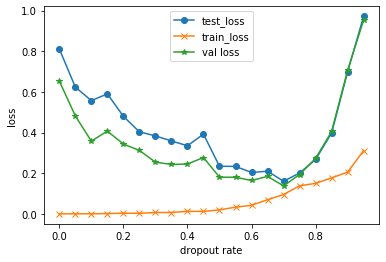

In [21]:
plt.plot(dropout_list, loss,'o-',label='test_loss')
print(dropout_list[19])
plt.plot(dropout_list, train_loss,'x-',label='train_loss')
plt.plot(dropout_list, loss_valid,'*-',label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('dropout rate')
